In [56]:
import scipy.stats

import numpy as np
import pandas as pd

In [57]:
# entropy func from SO
def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [58]:
# read scatter data
df = pd.read_json("data/scatterData.json")
df.head()

,Height,Diameter,Family
0,5.378135,0.283705,apple
1,7.026771,0.332076,apple
2,8.315905,0.433735,apple
3,3.649893,0.340193,apple
4,6.507516,0.420813,apple


In [59]:
# sort values according to Diameter (so we can loop through them to calculate left vs right stuff)
svals = df.sort_values(by="Diameter").reset_index(drop=True)

In [60]:
ent(svals.Family)

1.0986122886681096

In [61]:
# create range of plausible x-values (Diameter) 
range_vals = np.linspace(svals.Diameter[0], svals.Diameter[149], 300)

In [62]:
ent(svals[svals.Diameter > v].Family)

0.0

In [67]:
# iterate across data and calculate information gain, left entropy, right entropy

# init array to hold values
chart_values = []

# for each value of Diameter (in order)...
for v in range_vals:
    # separate elements on either side of current x-value (plausible Diameter value)
    left_vals = svals[svals.Diameter < v].Family
    right_vals = svals[svals.Diameter > v].Family
    
    # count # elements on either side of current x-value 
    n_left = left_vals.size
    n_right = right_vals.size
    
    # calculate entropy for data on either side of current x-value
    ent_left = ent(left_vals)
    ent_right = ent(right_vals)
    # calculate information gain 
    ig = ent(svals.Family) - ((n_left * ent_left + n_right * ent_right) / (n_left+n_right))
    # save to dict and push to array
    chart_values.append({
        'Diameter': np.round(v, 3),
        'n_left': n_left,
        'ent_left': np.round(ent_left, 2),
        'n_right': n_right,
        'ent_right': np.round(ent_right, 2),
        'ig': np.round(ig, 2)
    })

<AxesSubplot:>

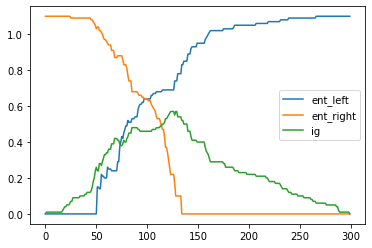

In [68]:
# plot data to make sure makes sense
pd.DataFrame(chart_values)[['ent_left', 'ent_right', 'ig']].plot()

In [69]:
# create final dataframe for chart
final_df = pd.DataFrame(chart_values)[['Diameter', 'ent_left', 'ent_right', 'ig']]
final_df

,Diameter,ent_left,ent_right,ig
0,0.043,0.0,1.1,0.00
1,0.046,0.0,1.1,0.01
2,0.050,0.0,1.1,0.01
3,0.053,0.0,1.1,0.01
4,0.056,0.0,1.1,0.01
...,...,...,...,...
295,0.990,1.1,0.0,0.01
296,0.993,1.1,0.0,0.01
297,0.997,1.1,0.0,0.01
298,1.000,1.1,0.0,0.01


In [70]:
# save to json (then copy to data.js as `informationGainData`)
final_df.to_json('./data/entropyScatter.json', orient='records')